In [17]:
import pandas as pd
from shapely.geometry import shape
from shapely.geometry import Polygon, box
import pandas as pd
import geopandas as gpd
import numpy as np
import collections
import matplotlib.pyplot as plt

from sodapy import Socrata



def get_nycdata(key,limit=500000):
    client = Socrata("data.cityofnewyork.us", None)
    results = client.get(key, limit=limit)
    return pd.DataFrame.from_records(results)

In [3]:
### Note: this can timeout due to the api and not be authenticated when accessing

df1 = get_nycdata("fwpa-qxaf") #Pedestrian mobility
df2 = get_nycdata("cqsj-cfgu") # Bi-annual pedestrian counts
df3 = get_nycdata("78sp-6jhj") # sidewalk repair
df4 = get_nycdata("3as9-uee8") # 2015 street tree census
df5 = get_nycdata("mk9u-qu7i") # green streets
df6 = get_nycdata("ue2e-9jm2") # public plazas
df7 = get_nycdata("8knb-zsb6") # skate parks
df8 = get_nycdata("ifu9-zqkd") # million trees forest restoration
df9 = get_nycdata("jknp-skuy") # speed humps
df10 = get_nycdata("jjja-shxy") # truck routes
df11 = get_nycdata("mc7h-evz7") # landfills 



df12 = get_nycdata("mrjc-v9pm") # Flood vulnerability
df13 = get_nycdata("c3uy-2p5r") # air quality
df14 = get_nycdata("mvte-j9h9") # saltwater fishing sites
df15 = get_nycdata("rvih-nhyn") # privately owned public spaces
df16 = get_nycdata("27ya-gqtm") # sea level rise maps
df17 = get_nycdata("fuhs-xmg2") # Urban Park Ranger Animal Condition Response

# large datasets 
# df18 = get_nycdata("hn5i-inap") # forestry tree points
# df19 = get_nycdata("p937-wjvj") # rodent inspection
# df20 = get_nycdata("h9gi-nx95") # motor vehicle crashes
# df21 = get_nycdata("erm2-nwe9") # service requests


# Missing 3 & 13
# dfs = [df1,
#        df2,
#        df3,
#        df4,
#        df5,
#        df6, 
#        df7, 
#        df8, 
#        df9, 
#        df10,
#        df11,
#        df12,
#        df13, 
#        df14, 
#        df15, 
#        df16,
#        df17]

In [4]:
# df2locationCol = {
#     'df1' : 'the_geom',
#     "df2" : 'the_geom',
#     'df4' : 'the_geom',
#     'df5' : 'multipolygon',
#     'df6' : 'the_geom',
#     'df7' : 'the_geom',
#     'df8' : 'the_geom',
#     'df9' : 'the_geom',
#     'df10' : 'the_geom',
#     'df11' : 'the_geom',
#     'df12' : 'the_geom',
#     'df14' : 'the_geom',
#     'df15' : 'geocoded_column',
#     'df16' : 'the_geom',
#     'df18' : 'location',
#     'df20' : 'location'
    
    
# }


In [27]:



df1['the_geom'] = df1['the_geom'].apply(shape)
df2['the_geom'] = df2['the_geom'].apply(shape)
df4['the_geom'] = df4['the_geom'].apply(shape)
df5['the_geom'] = df5['multipolygon'].apply(shape)
df6['the_geom'] = df6['the_geom'].apply(shape)
df7['the_geom'] = df7['the_geom'].apply(shape)
df8['the_geom'] = df8['the_geom'].apply(shape)
df9 = df9[df9['the_geom'].apply(lambda x: isinstance(x, collections.abc.Mapping))]
df9['the_geom'] = df9['the_geom'].apply(shape)

df10['the_geom'] = df10['the_geom'].apply(shape)
df11['the_geom'] = df11['the_geom'].apply(shape)
df12['the_geom'] = df12['the_geom'].apply(shape)
df14['the_geom'] = df14['the_geom'].apply(shape)
df15['the_geom'] = df15['geocoded_column'].apply(shape)
df16['the_geom'] = df16['the_geom'].apply(shape)
# df18['the_geom'] =  df18['location'].apply(shape)



/var/folders/j8/0zqbt2cj1td02vsxqh5n3n100000gn/T/ipykernel_43005/2840082238.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['the_geom'] = df9['the_geom'].apply(shape)


In [7]:
# These are large datasets, so for now dropping duplicates makes the hearmap simple
df19 = df19.drop_duplicates(subset=['longitude','latitude'])
df20 = df20.drop_duplicates(subset=['longitude','latitude'])

In [8]:
gdfs = [gpd.GeoDataFrame(df1, geometry='the_geom', crs="EPSG:4326"), #Pedestrian mobility
        gpd.GeoDataFrame(df2, geometry='the_geom', crs="EPSG:4326"), # Bi-annual pedestrian counts
        gpd.GeoDataFrame(df4, geometry='the_geom', crs="EPSG:4326"), # 2015 street tree census
        gpd.GeoDataFrame(df5, geometry='the_geom', crs="EPSG:4326"), # green streets
        gpd.GeoDataFrame(df6, geometry='the_geom', crs="EPSG:4326"), # public plazas
        gpd.GeoDataFrame(df7, geometry='the_geom', crs="EPSG:4326"), # skate parks
        gpd.GeoDataFrame(df8, geometry='the_geom', crs="EPSG:4326"), # million trees forest restoration
        gpd.GeoDataFrame(df9, geometry='the_geom', crs="EPSG:4326"), # speed humps
        gpd.GeoDataFrame(df10, geometry='the_geom', crs="EPSG:4326"), # truck routes
        gpd.GeoDataFrame(df11, geometry='the_geom', crs="EPSG:4326"),  # landfills 
        gpd.GeoDataFrame(df12, geometry='the_geom', crs="EPSG:4326"), # Flood vulnerability
        gpd.GeoDataFrame(df14, geometry='the_geom', crs="EPSG:4326"), # saltwater fishing sites
        gpd.GeoDataFrame(df15, geometry='the_geom', crs="EPSG:4326"), # privately owned public spaces
        gpd.GeoDataFrame(df16, geometry='the_geom', crs="EPSG:4326"), # sea level rise maps
#         gpd.GeoDataFrame(df18, geometry='the_geom', crs="EPSG:4326"), # forestry tree points
#         gpd.GeoDataFrame(df19,geometry=gpd.points_from_xy(df19['longitude'], df19['latitude']), crs="EPSG:4326"), # rodent inspection
#         gpd.GeoDataFrame(df20,geometry=gpd.points_from_xy(df20['longitude'], df20['latitude']), crs="EPSG:4326") # motor vehicle crashes
       ]



In [18]:
import geopandas as gpd
import pandas as pd
import numpy as np
import math
import time
from shapely.geometry import Polygon, box
from typing import List, Union

# -----------------------------
# Helper: make hexagon (flat-top)
# -----------------------------
def hexagon(cx, cy, size):
    angles_deg = [0, 60, 120, 180, 240, 300]
    angles_rad = np.deg2rad(angles_deg)
    return Polygon([(cx + size * math.cos(a), cy + size * math.sin(a)) for a in angles_rad])

# -----------------------------
# Build hex grid (only where needed)
# -----------------------------
def build_hex_grid(minx, miny, maxx, maxy, hex_width=500):
    """Return GeoDataFrame of hexes in EPSG:3857 with dataset_count column."""
    size = hex_width / 2.0   # center -> vertex distance horizontally
    hex_w = 2 * size
    hex_h = math.sqrt(3) * size

    buffer = hex_w
    minx2, maxx2 = minx - buffer, maxx + buffer
    miny2, maxy2 = miny - buffer, maxy + buffer

    hexes = []
    row = 0
    y = miny2
    while y < maxy2:
        x_offset = hex_w / 2.0 if row % 2 else 0.0
        x = minx2 + x_offset
        while x < maxx2:
            h = hexagon(x, y, size)
            # Keep hex if it intersects the original bounding box (trim empty space)
            if h.intersects(box(minx, miny, maxx, maxy)):
                hexes.append(h)
            x += hex_w
        y += hex_h * 0.75
        row += 1

    grid = gpd.GeoDataFrame({"geometry": hexes}, crs="EPSG:3857")
    grid["dataset_count"] = 0
    return grid

# -----------------------------
# Convert input (pandas df or gdf) to GeoDataFrame in EPSG:3857
# -----------------------------
def to_gdf_meters(df_or_gdf: Union[pd.DataFrame, gpd.GeoDataFrame],
                  lat_col="lat", lon_col="lon",
                  geometry_col=None) -> gpd.GeoDataFrame:
    """
    If geometry_col is provided and df_or_gdf is GeoDataFrame, it will use that.
    Otherwise expects lat_col/lon_col in a pandas DataFrame.
    Returns GeoDataFrame in EPSG:3857.
    """
    if isinstance(df_or_gdf, gpd.GeoDataFrame):
        gdf = df_or_gdf.copy()
        if geometry_col:
            gdf = gdf.set_geometry(geometry_col)
    else:
        # pandas DataFrame -> create points from lon,lat
        if lon_col not in df_or_gdf.columns or lat_col not in df_or_gdf.columns:
            raise ValueError(f"Input DataFrame missing '{lat_col}' or '{lon_col}' columns.")
        gdf = gpd.GeoDataFrame(df_or_gdf.copy(),
                               geometry=gpd.points_from_xy(df_or_gdf[lon_col], df_or_gdf[lat_col]),
                               crs="EPSG:4326")

    if gdf.crs is None:
        gdf = gdf.set_crs("EPSG:4326")
    gdf = gdf.to_crs(epsg=3857)
    return gdf

# -----------------------------
# FAST pipeline WITHOUT union/dissolve
# -----------------------------
def build_hex_heatmap_fast(datasets: List[Union[pd.DataFrame, gpd.GeoDataFrame]],
                           lat_col="lat", lon_col="lon",
                           geometry_col=None,
                           hex_width=500,
                           simplify_tolerance: float = 0.0,
                           refine_intersection: bool = True,
                           verbose: bool = True):
    """
    Build hex grid heatmap that counts how many datasets intersect each hex.
    - datasets: list of pandas DataFrames (lat/lon) or GeoDataFrames
    - hex_width: hexagon "across flats" width in meters (e.g., 500)
    - simplify_tolerance: if >0, simplify geometries per dataset (meters)
    - refine_intersection: after sindex candidate selection, refine with .intersects
    Returns: GeoDataFrame grid in EPSG:4326 with 'dataset_count'
    """
    t0 = time.time()
    # 1) Convert datasets to GeoDataFrames in meters
    gdfs_m = []
    for ds in datasets:
        gdf = to_gdf_meters(ds, lat_col=lat_col, lon_col=lon_col, geometry_col=geometry_col)
        # Drop empty geometries
        gdf = gdf[~gdf.geometry.isna()].copy()
        # Optional simplify to speed spatial index and reduce vertices (only if meaningful)
        if simplify_tolerance and simplify_tolerance > 0:
            try:
                gdf["geometry"] = gdf.geometry.simplify(simplify_tolerance)
            except Exception:
                pass
        gdfs_m.append(gdf)

    # 2) Compute combined bounding box across all datasets (to build grid only where needed)
    bboxes = [g.total_bounds for g in gdfs_m if not g.empty]
    if not bboxes:
        raise ValueError("No valid geometries in input datasets.")
    minx = min(b[0] for b in bboxes)
    miny = min(b[1] for b in bboxes)
    maxx = max(b[2] for b in bboxes)
    maxy = max(b[3] for b in bboxes)

    # 3) Build hex grid in EPSG:3857
    grid = build_hex_grid(minx, miny, maxx, maxy, hex_width=hex_width)
    # force creation of spatial index
    _ = grid.sindex

    if verbose:
        print(f"[info] Built grid with {len(grid)} hexes; converting datasets and running spatial index queries...")

    # 4) For each dataset, find candidate hexes via spatial index in bulk and increment count once per dataset
    for i, g in enumerate(gdfs_m):
        if g.empty:
            if verbose:
                print(f"[{i}] dataset empty -> skipped")
            continue

        start = time.time()
        try:
            # try vectorized bulk query (fast). Returns 2 x N array of matches:
            # first row = index of geometry in left (g), second row = index of geometry in right (grid)
            matches = grid.sindex.query_bulk(g.geometry, predicate="intersects")
            # matches[1] are grid indices (right side)
            grid_indices = np.unique(matches[1])
            if refine_intersection:
                # refine to ensure true intersects (candidate grid subset)
                candidate_geoms = grid.geometry.iloc[grid_indices]
                # intersects with the whole dataset geometry collection is expensive; do per-candidate:
                # For correctness we check candidate hex intersects any geometry in g via unary bbox check then geometric intersects:
                # But since matches came from predicate='intersects' this refine is often redundant — we still keep it optional.
                # We'll keep the matches directly to avoid extra cost.
                true_idx = grid_indices
            else:
                true_idx = grid_indices

            # increment dataset_count for those hexes once
            if len(true_idx):
                grid.loc[true_idx, "dataset_count"] += 1

            if verbose:
                print(f"[{i}] matched {len(grid_indices)} hexes - time {time.time() - start:.2f}s")
            continue

        except Exception:
            # If query_bulk not supported, fallback to per-geometry bbox query (still faster than per-hex)
            if verbose:
                print(f"[{i}] query_bulk failed, falling back to per-geometry sindex.query (slower).")

        # Fallback method: use sindex.query per geometry but collect unique hex indices
        candidate_set = set()
        sidx = grid.sindex
        for geom in g.geometry:
            try:
                c = list(sidx.query(geom))
            except Exception:
                # older versions of rtree may require different call; try without predicate
                c = list(sidx.query(geom))
            if not c:
                continue
            if refine_intersection:
                # refine exact intersects on candidate subset
                # build boolean mask quickly
                mask = grid.geometry.iloc[c].intersects(geom)
                true = [c[idx] for idx, val in enumerate(mask) if val]
                candidate_set.update(true)
            else:
                candidate_set.update(c)

        if candidate_set:
            grid.loc[list(candidate_set), "dataset_count"] += 1
        if verbose:
            print(f"[{i}] fallback matched {len(candidate_set)} hexes - time {time.time() - start:.2f}s")

    # 5) Finish: reproject grid back to WGS84 for plotting/export
    grid_wgs84 = grid.to_crs(epsg=4326)
    if verbose:
        print(f"[done] total time: {time.time() - t0:.2f}s")
    return grid_wgs84




[info] Built grid with 584335 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 157995 hexes - time 1.86s
[done] total time: 57.73s


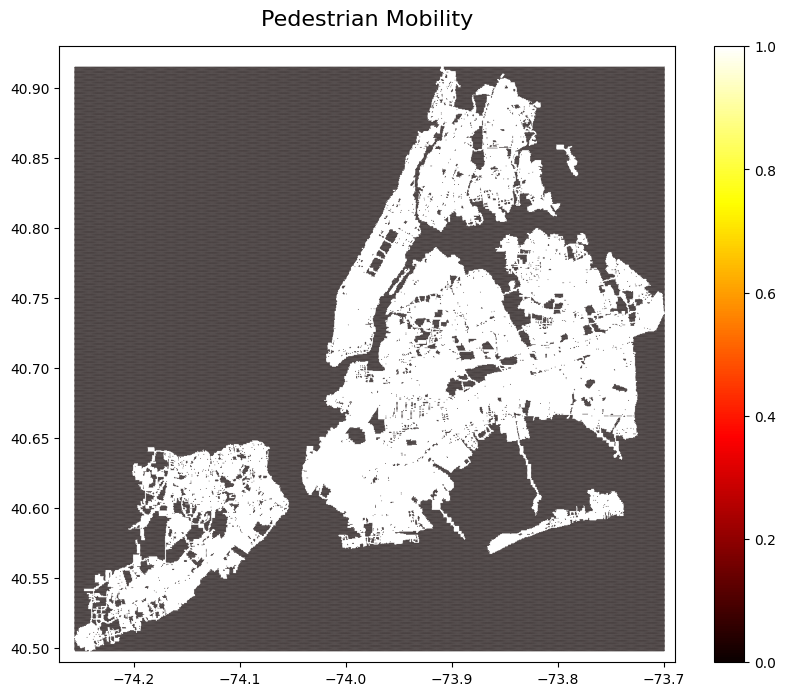

[info] Built grid with 324434 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 152 hexes - time 0.00s
[done] total time: 29.12s


<Figure size 640x480 with 0 Axes>

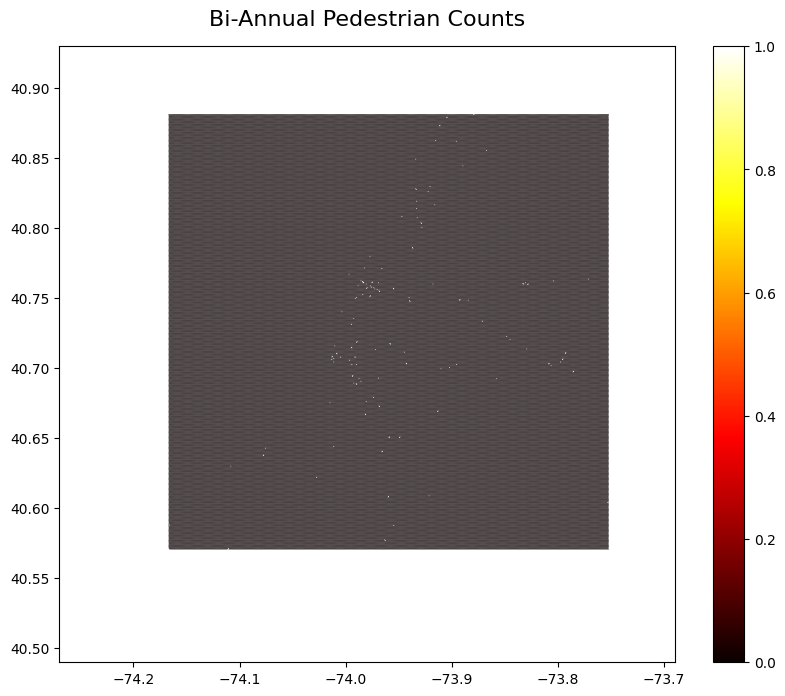

[info] Built grid with 300389 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 204 hexes - time 0.00s
[done] total time: 29.57s


<Figure size 640x480 with 0 Axes>

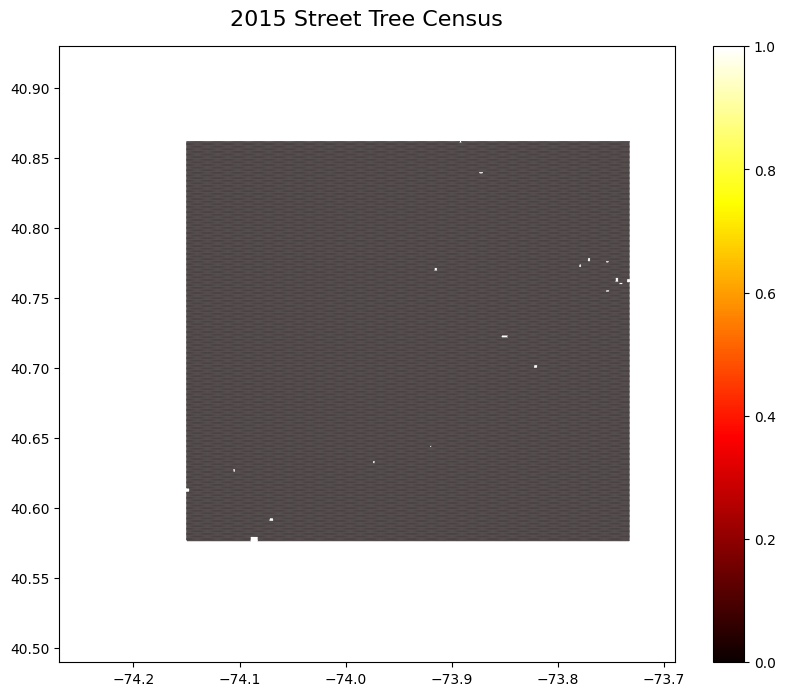

[info] Built grid with 548388 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 7282 hexes - time 0.04s
[done] total time: 47.93s


<Figure size 640x480 with 0 Axes>

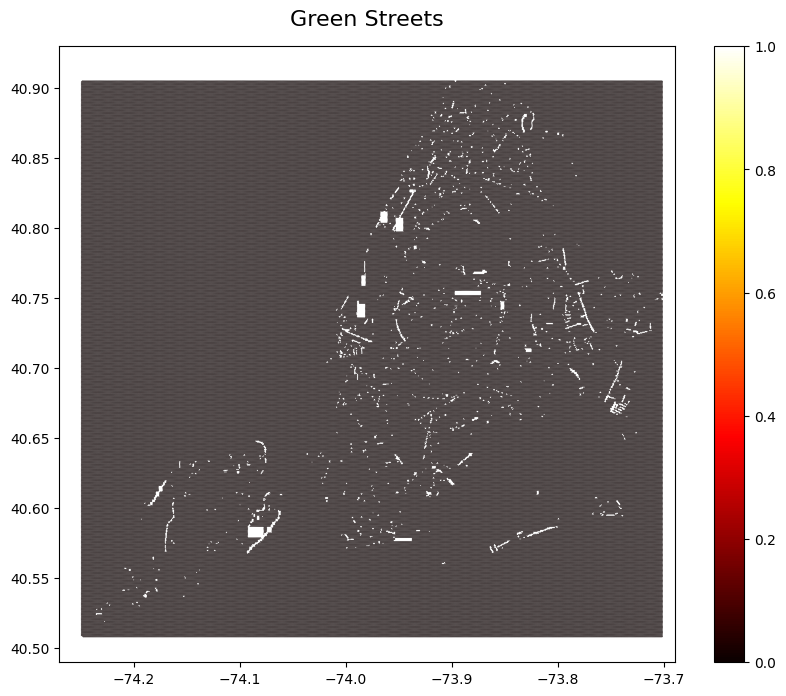

[info] Built grid with 557991 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 5544 hexes - time 0.03s
[done] total time: 48.95s


<Figure size 640x480 with 0 Axes>

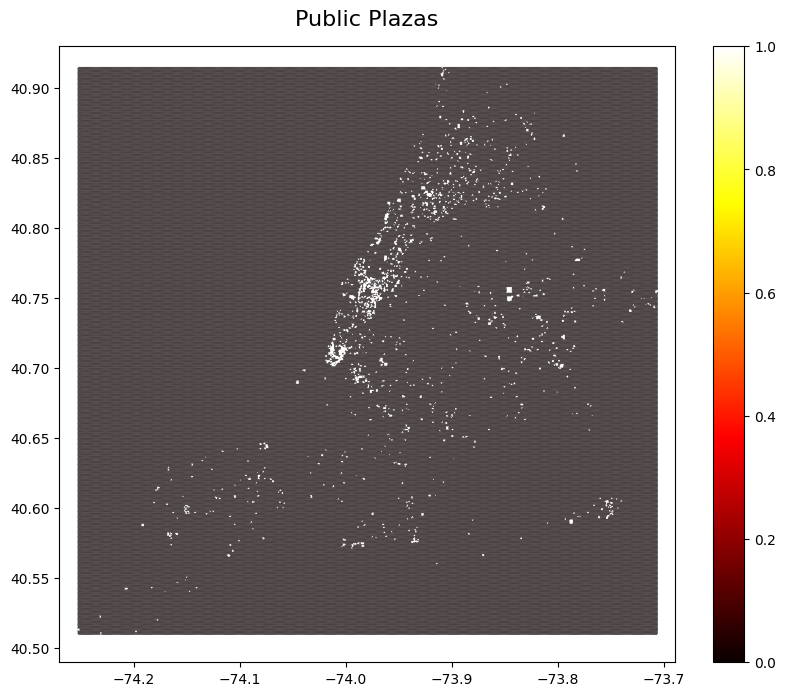

[info] Built grid with 320139 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 159 hexes - time 0.00s
[done] total time: 30.49s


<Figure size 640x480 with 0 Axes>

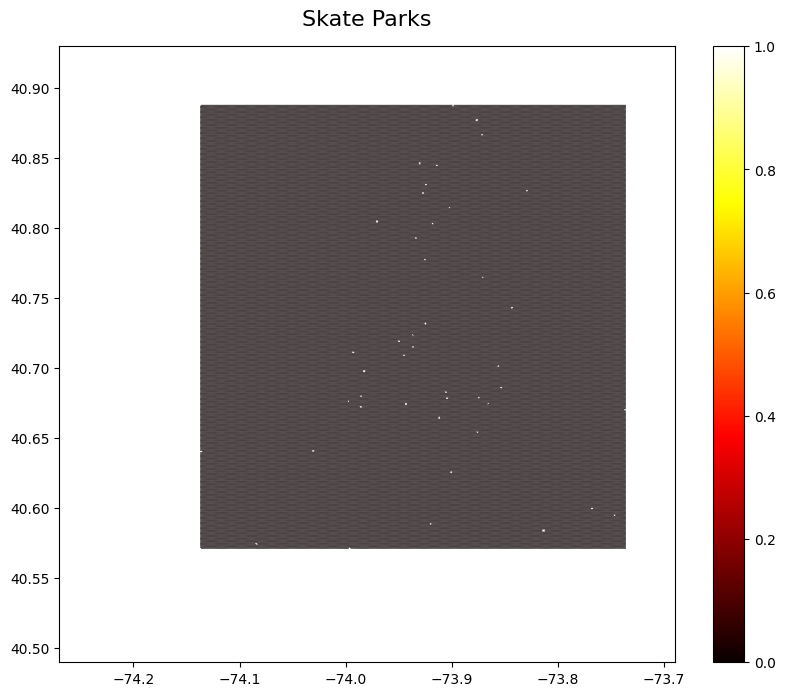

[info] Built grid with 543119 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 2215 hexes - time 0.01s
[done] total time: 47.91s


<Figure size 640x480 with 0 Axes>

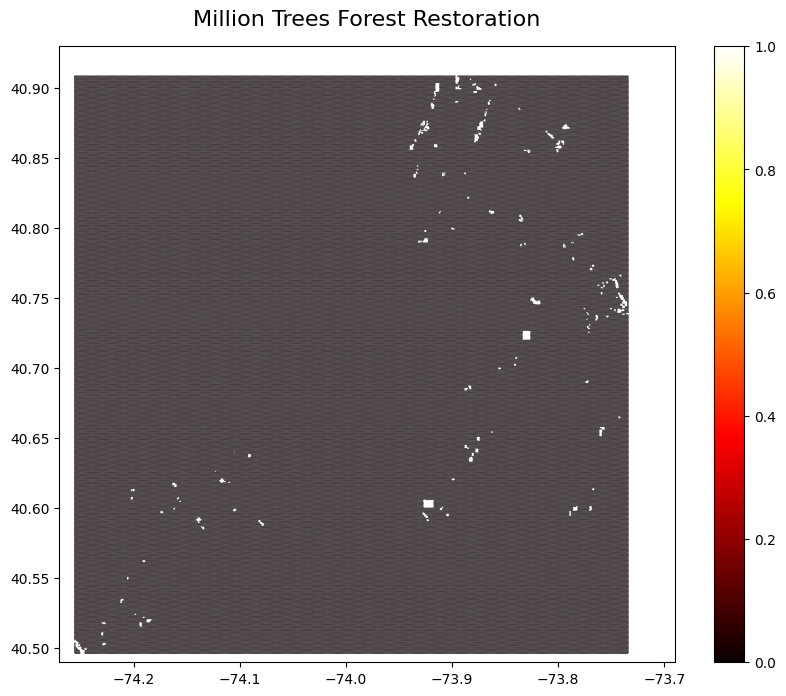

[info] Built grid with 573475 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 134530 hexes - time 0.13s
[done] total time: 50.36s


<Figure size 640x480 with 0 Axes>

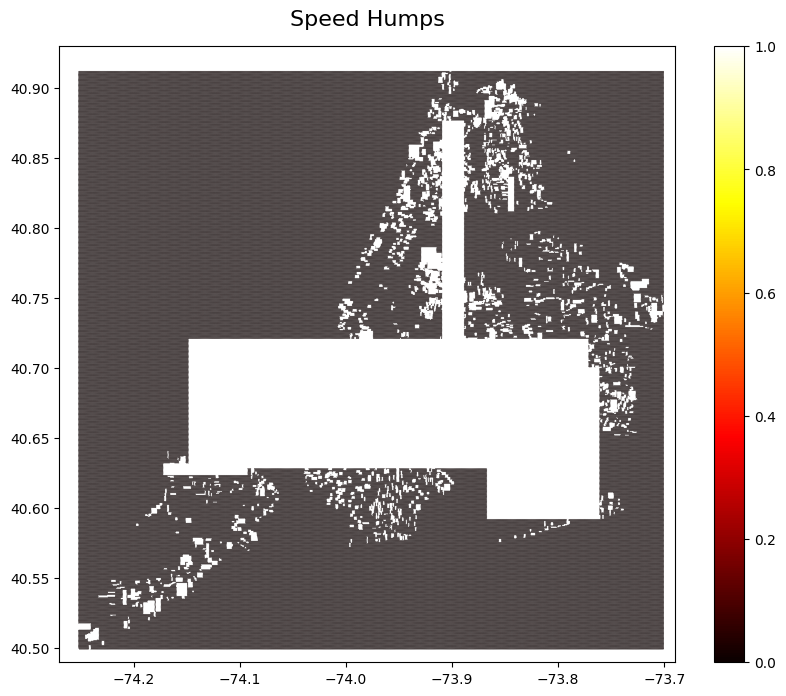

[info] Built grid with 573193 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 45079 hexes - time 0.47s
[done] total time: 53.93s


<Figure size 640x480 with 0 Axes>

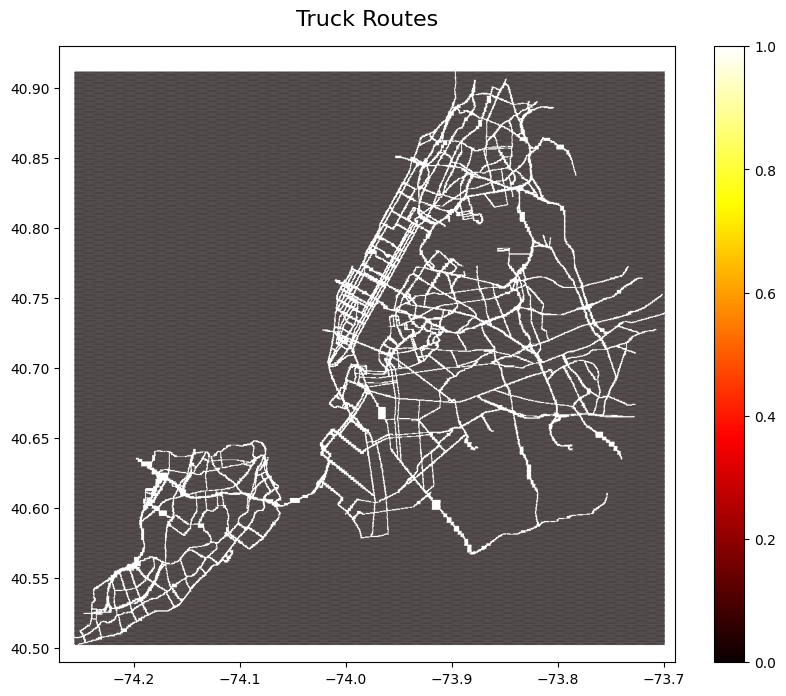

[info] Built grid with 337553 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 5680 hexes - time 0.00s
[done] total time: 29.70s


<Figure size 640x480 with 0 Axes>

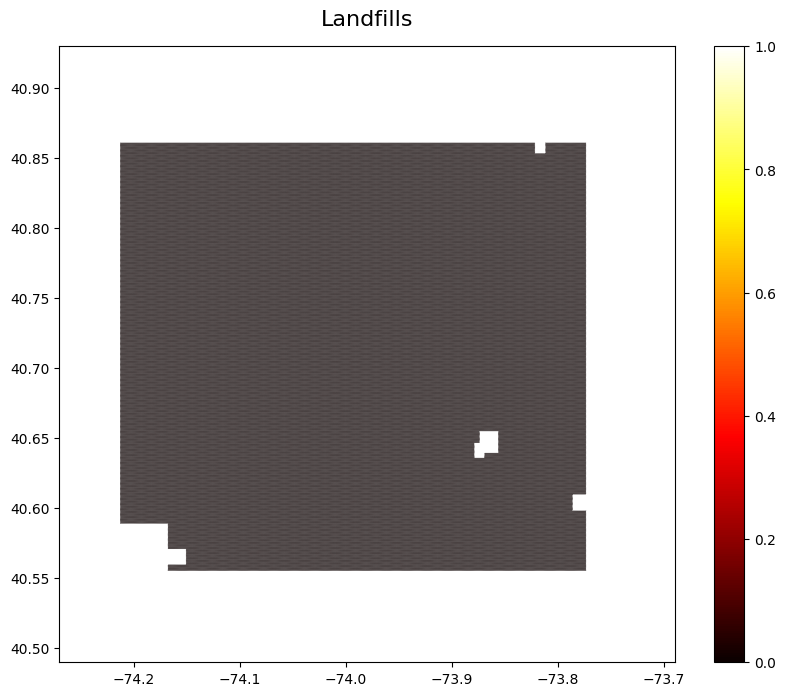

[info] Built grid with 587902 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 213122 hexes - time 0.18s
[done] total time: 54.33s


<Figure size 640x480 with 0 Axes>

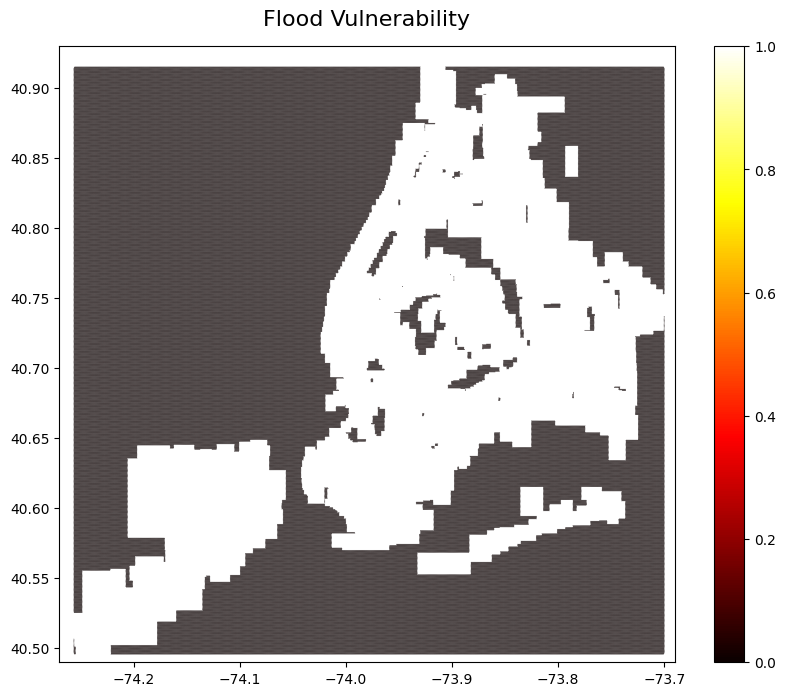

[info] Built grid with 522001 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 141 hexes - time 0.00s
[done] total time: 48.85s


<Figure size 640x480 with 0 Axes>

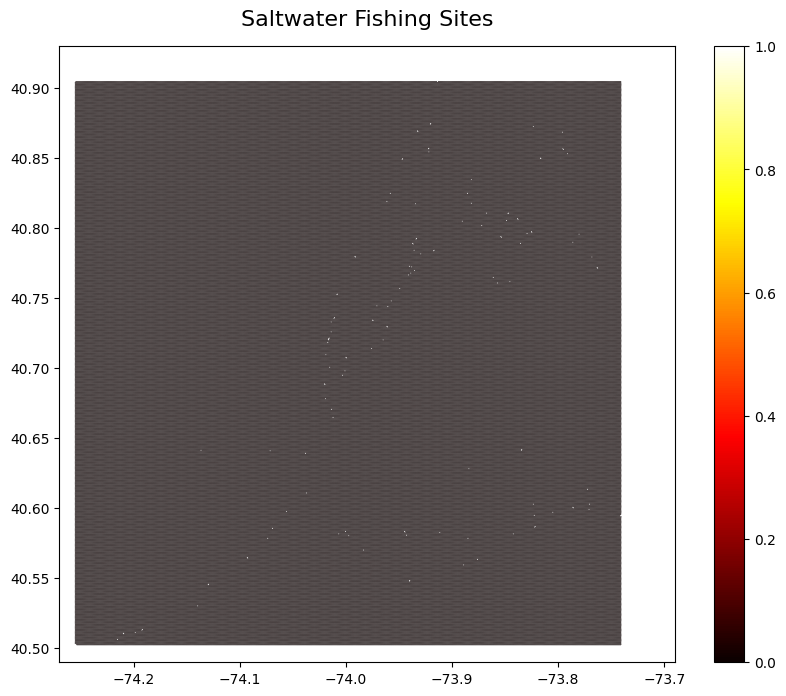

[info] Built grid with 255016 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 534 hexes - time 0.01s
[done] total time: 22.50s


<Figure size 640x480 with 0 Axes>

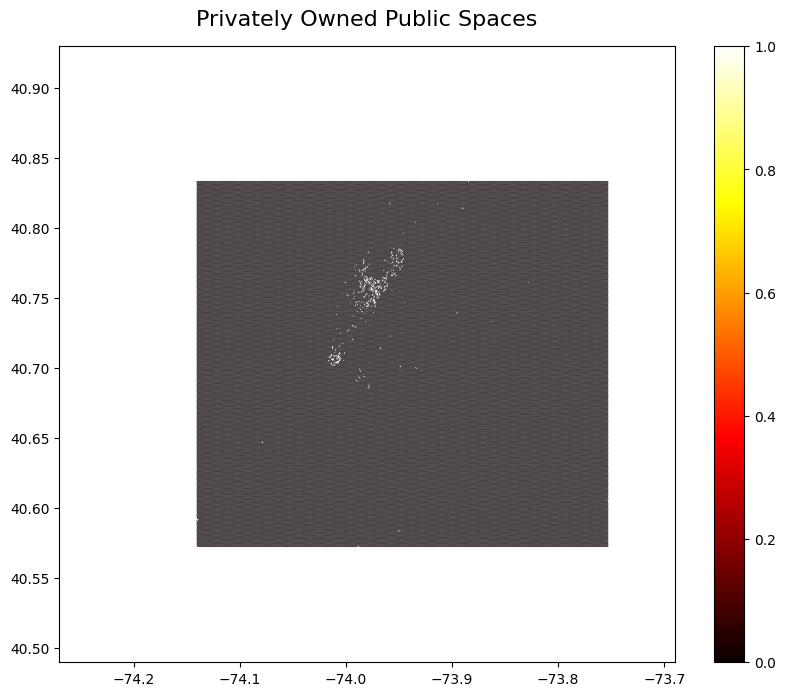

[info] Built grid with 593279 hexes; converting datasets and running spatial index queries...
[0] query_bulk failed, falling back to per-geometry sindex.query (slower).
[0] fallback matched 196698 hexes - time 0.35s
[done] total time: 57.45s


<Figure size 640x480 with 0 Axes>

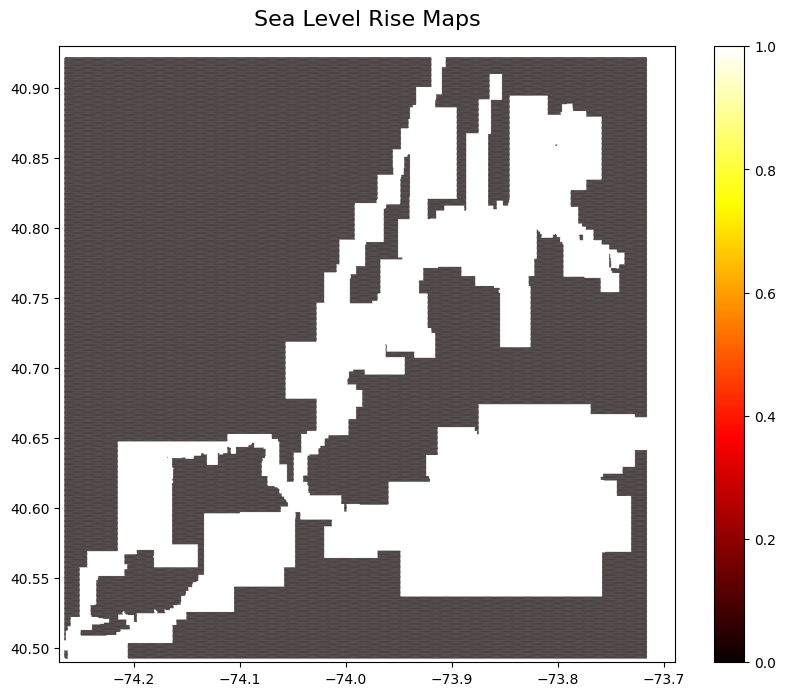

<Figure size 640x480 with 0 Axes>

In [36]:
titles = ['Pedestrian Mobility','Bi-Annual Pedestrian Counts','2015 Street Tree Census','Green Streets',
          'Public Plazas','Skate Parks','Million Trees Forest Restoration','Speed Humps',
         'Truck Routes','Landfills','Flood Vulnerability','Saltwater Fishing Sites','Privately Owned Public Spaces',
         'Sea Level Rise Maps']
for i in range(len(gdfs)):
    
    grid = build_hex_heatmap_fast([gdfs[i]],
                                 lat_col="lat", lon_col="lon",
                                 hex_width=100,
                                 simplify_tolerance=5.0,
                                 refine_intersection=False,  # faster, usually OK
                                 verbose=True)

    ax = grid.plot(column="dataset_count", cmap="hot", legend=True, figsize=(10, 8))
    
    ax.set_xlim([-74.27, -73.69])  # Longitude range
    ax.set_ylim([40.49, 40.93])    # Latitude range
    
    plt.title(titles[i], fontsize=16, pad=15)

    plt.show()
    
    plt.savefig(f"{titles[i]}.png", dpi=500, bbox_inches="tight")


In [31]:
gdfs = [gpd.GeoDataFrame(df1, geometry='the_geom', crs="EPSG:4326"), # Pedestrian mobility
        gpd.GeoDataFrame(df2, geometry='the_geom', crs="EPSG:4326"), # Bi-annual pedestrian counts
        gpd.GeoDataFrame(df4, geometry='the_geom', crs="EPSG:4326"), # 2015 street tree census
        gpd.GeoDataFrame(df5, geometry='the_geom', crs="EPSG:4326"), # green streets
        gpd.GeoDataFrame(df6, geometry='the_geom', crs="EPSG:4326"), # public plazas
        gpd.GeoDataFrame(df7, geometry='the_geom', crs="EPSG:4326"), # skate parks
        gpd.GeoDataFrame(df8, geometry='the_geom', crs="EPSG:4326"), # million trees forest restoration
        gpd.GeoDataFrame(df9, geometry='the_geom', crs="EPSG:4326"), # speed humps
        gpd.GeoDataFrame(df10, geometry='the_geom', crs="EPSG:4326"), # truck routes
        gpd.GeoDataFrame(df11, geometry='the_geom', crs="EPSG:4326"),  # landfills 
        gpd.GeoDataFrame(df12, geometry='the_geom', crs="EPSG:4326"), # Flood vulnerability
        gpd.GeoDataFrame(df14, geometry='the_geom', crs="EPSG:4326"), # saltwater fishing sites
        gpd.GeoDataFrame(df15, geometry='the_geom', crs="EPSG:4326"), # privately owned public spaces
        gpd.GeoDataFrame(df16, geometry='the_geom', crs="EPSG:4326"), # sea level rise maps
#         gpd.GeoDataFrame(df18, geometry='the_geom', crs="EPSG:4326"), # forestry tree points
#         gpd.GeoDataFrame(df19,geometry=gpd.points_from_xy(df19['longitude'], df19['latitude']), crs="EPSG:4326"), # rodent inspection
#         gpd.GeoDataFrame(df20,geometry=gpd.points_from_xy(df20['longitude'], df20['latitude']), crs="EPSG:4326") # motor vehicle crashes
       ]

